Зчитуємо CSV файл і виводимо перші п'ять рядків



In [5]:
import pandas as pd

df = pd.read_csv('metadata.csv')

df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виводимо розміри датасету і відповідаємо на питання


In [14]:
print(df.shape)

f"Кількість книг - {df.shape[0]}"

(550, 7)


'Кількість книг - 550'

In [19]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Перевірка пропусків у кожному зі стовпців


In [25]:
df.isna().sum()



name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? Відповідь: 

In [26]:
print("Ні")

Ні


Перевірка унікальних значень у колонці 'genre'


In [31]:
df['genre'].unique()

f"Які є унікальні жанри? {df['genre'].unique()} "

"Які є унікальні жанри? ['Non Fiction' 'Fiction'] "

Розподіл цін (гістограма)


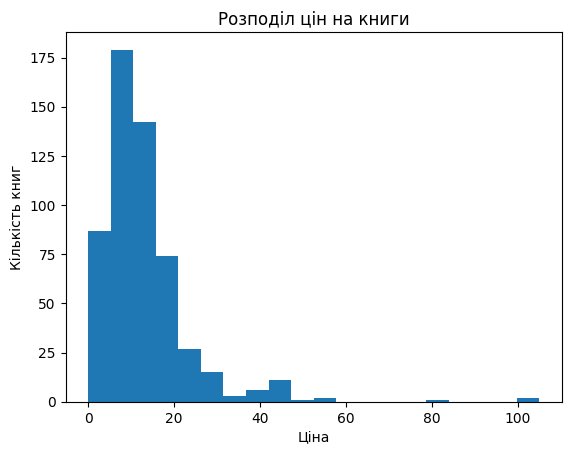

In [33]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20)
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.title('Розподіл цін на книги')
plt.show()


Визначення максимальної, мінімальної, середньої та медіанної цін


In [38]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()



In [39]:
f"Максимальна ціна? - {max_price}"


'Максимальна ціна? - 105'

In [40]:
f"Мінімальна ціна? - {min_price}"


'Мінімальна ціна? - 0'

In [41]:
f"Середня ціна? - {mean_price}"


'Середня ціна? - 13.1'

In [42]:
f"Медіанна ціна? - {median_price}"

'Медіанна ціна? - 11.0'

In [44]:
max_rating = df['user_rating'].max()
f"Який рейтинг у датасеті найвищий? {max_rating}"


'Який рейтинг у датасеті найвищий? 4.9'

In [46]:
df[df['user_rating'] == max_rating].shape[0]

52

In [48]:
f"Скільки книг мають такий рейтинг? - {df[df['user_rating'] == max_rating].shape[0]}"

'Скільки книг мають такий рейтинг? - 52'

In [50]:
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
f"Яка книга має найбільше відгуків? - {max_reviews_book}"

'Яка книга має найбільше відгуків? - Where the Crawdads Sing'

In [52]:
expensive_book_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price', ascending=False).iloc[-1]['name']
f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? - {expensive_book_2015}"

'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? - To Kill a Mockingbird'

In [54]:
fiction_2010_count = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]

print(f'Кількість книг жанру Fiction у Топ-50 у 2010 році: {fiction_2010_count}')


Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


In [57]:
rating_4_9_count1 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]

print(f'Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: {rating_4_9_count1}')

rating_4_9_count2 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]

print(f'Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: {rating_4_9_count2}')



Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: 1
Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: 1


In [53]:
f"Яка книга остання у відсортованому списку? - {expensive_book_2015}"

'Яка книга остання у відсортованому списку? - To Kill a Mockingbird'

Групуємо за жанром та використовуємо функції agg для знаходження максимальної та мінімальної ціни


In [59]:
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print(genre_prices)



             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [60]:
print("Максимальна та мінімальна ціни для жанру Fiction:")
print(f"Максимальна ціна: {genre_prices.loc['Fiction', 'max']}")
print(f"Мінімальна ціна: {genre_prices.loc['Fiction', 'min']}")
print("\nМаксимальна та мінімальна ціни для жанру Non Fiction:")
print(f"Максимальна ціна: {genre_prices.loc['Non Fiction', 'max']}")
print(f"Мінімальна ціна: {genre_prices.loc['Non Fiction', 'min']}")

Максимальна та мінімальна ціни для жанру Fiction:
Максимальна ціна: 82
Мінімальна ціна: 0

Максимальна та мінімальна ціни для жанру Non Fiction:
Максимальна ціна: 105
Мінімальна ціна: 0


Групуємо за автором та рахуємо кількість книг


In [62]:
author_books_count = df.groupby('author').size().reset_index(name='book_count')
print(author_books_count)


                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [63]:
print(f"Розмірність таблиці: {author_books_count.shape}")
print(f"Автор з найбільшою кількістю книг: {author_books_count.loc[author_books_count['book_count'].idxmax(), 'author']}")
print(f"Кількість книг цього автора: {author_books_count['book_count'].max()}")


Розмірність таблиці: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


Групуємо за автором та використовуємо функцію agg для знаходження середнього рейтингу


In [65]:
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index(name='avg_rating')
print(author_avg_rating)



                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


In [66]:
print(f"Автор з найнижчим середнім рейтингом: {author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin(), 'author']}")
print(f"Середній рейтинг цього автора: {author_avg_rating['avg_rating'].min()}")

Автор з найнижчим середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9


З'єднання двох датафреймів за автором


In [67]:
merged_df = pd.concat([author_books_count, author_avg_rating['avg_rating']], axis=1)




Сортуємо за кількістю книг та середнім рейтингом


In [68]:
sorted_df = merged_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])



In [69]:
print(f"Перший автор у відсортованому списку: {sorted_df['author'].iloc[0]}")

Перший автор у відсортованому списку: Muriel Barbery


Графік розподілу рейтингів


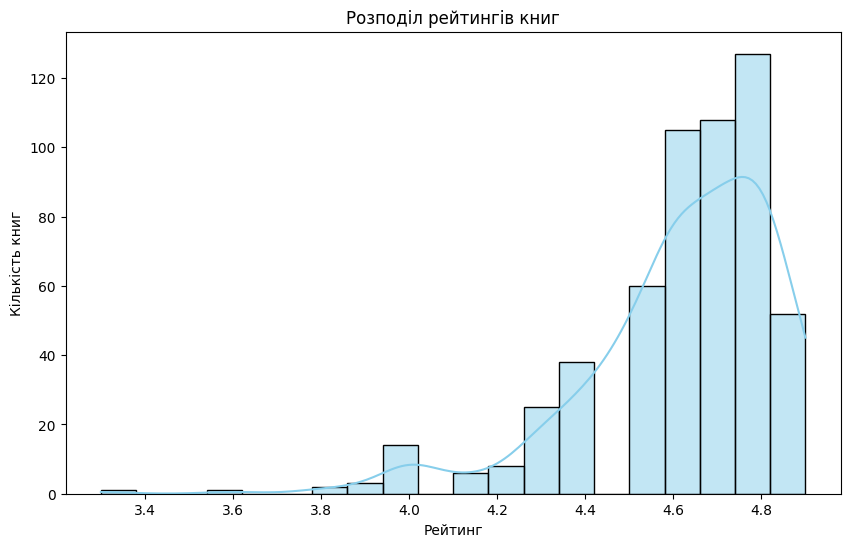

In [70]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['user_rating'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл рейтингів книг')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()


Графік залежності ціни від кількості відгуків


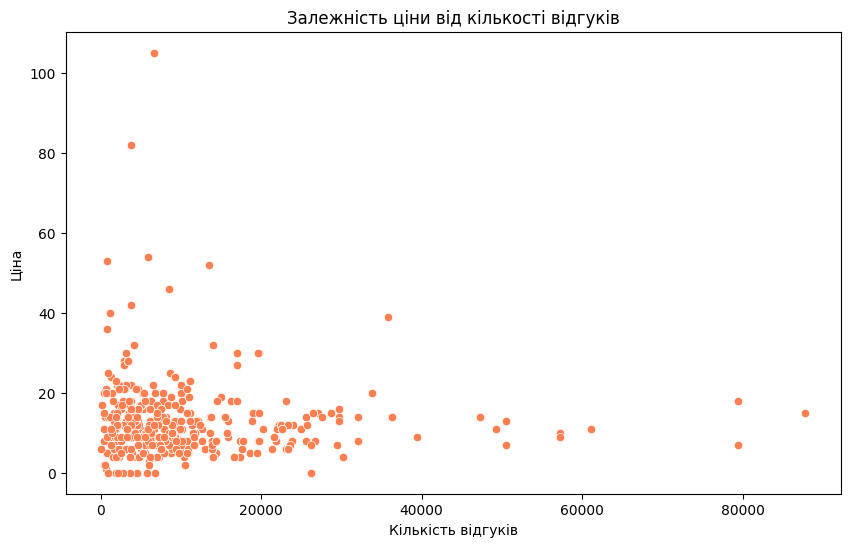

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews', y='price', data=df, color='coral')
plt.title('Залежність ціни від кількості відгуків')
plt.xlabel('Кількість відгуків')
plt.ylabel('Ціна')
plt.show()


Ящикова діаграма для рейтингів книг у жанрі Fiction та Non Fiction


C:\Users\Міша\AppData\Local\Temp\ipykernel_42440\2390498513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_rating', data=df, palette='pastel')


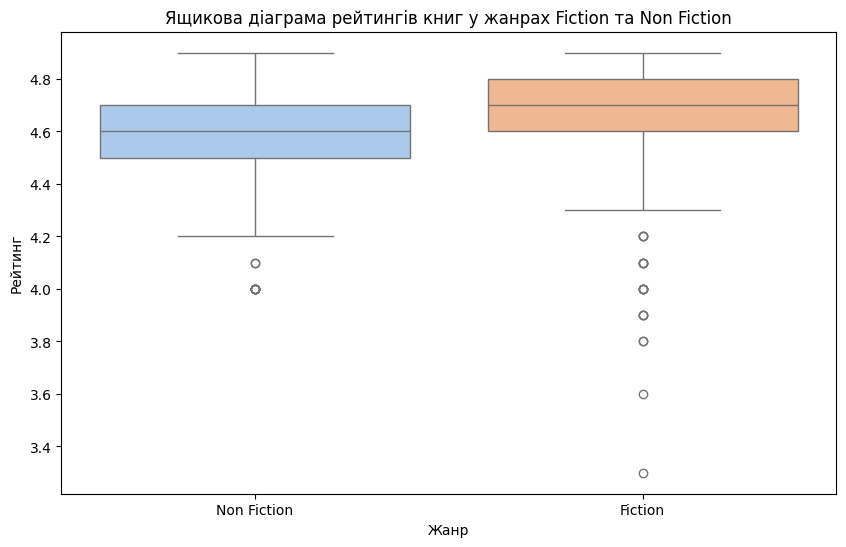

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_rating', data=df, palette='pastel')
plt.title('Ящикова діаграма рейтингів книг у жанрах Fiction та Non Fiction')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.show()
